In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the files with pandas read_csv. Separator is "\t" as they are tsv-files. 

In [3]:
df_train_all = pd.read_csv("data/train/multimodal_train.tsv", sep="\t")
df_validate_all = pd.read_csv("data/validate/multimodal_validate.tsv", sep="\t")
df_test_all = pd.read_csv("data/test/multimodal_test_public.tsv", sep="\t")

In [4]:
df_train_all.shape, df_test_all.shape, df_validate_all.shape

((564000, 16), (59319, 16), (59342, 16))

In [5]:
df_train_all.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


Showing distribution of each class for all sets 

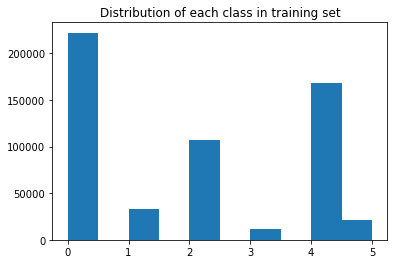

In [5]:
plt.hist(df_train_all["6_way_label"])
plt.title("Distribution of each class in training set")
plt.show()

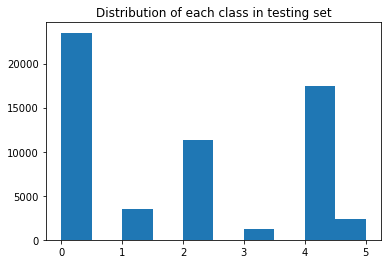

In [6]:
plt.hist(df_test_all["6_way_label"])
plt.title("Distribution of each class in testing set")
plt.show()

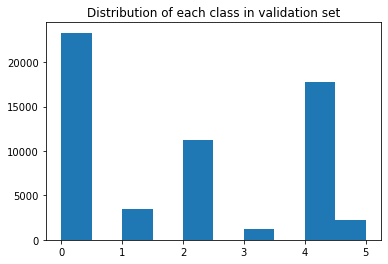

In [7]:
plt.hist(df_validate_all["6_way_label"])
plt.title("Distribution of each class in validation set")
plt.show()

As seen above, all sets are almost equally distributed, but some class are more represented than others. 

Removing all rows where domain is not known, as there were problems loading many of these images, since some webpages didn't exist anymore. 

In [8]:
df_train_all = df_train_all[df_train_all["domain"].notna()]
df_test_all = df_test_all[df_test_all["domain"].notna()]
df_validate_all = df_validate_all[df_validate_all["domain"].notna()]

In [9]:
df_train_all.shape, df_validate_all.shape, df_test_all.shape

((396143, 16), (41532, 16), (41847, 16))

Distribution after cleaning: 

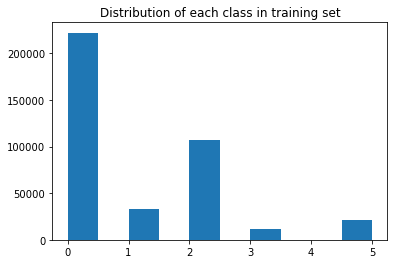

In [11]:
plt.hist(df_train_all["6_way_label"])
plt.title("Distribution of each class in training set")
plt.show()

As seen above, all rows containing class 4 are removed. Meaning all class-4-images have no domain. 

Sampling 10% of random rows from each dataframe, to minimize storage issues with images. 

In [6]:
df_train_sample = df_train_all.sample(frac=0.1)
df_test_sample = df_test_all.sample(frac=0.1)
df_validate_sample = df_validate_all.sample(frac=0.2)

In [6]:
df_train_sample.shape, df_test_sample.shape, df_validate_sample.shape

((39614, 16), (4185, 16), (4153, 16))

Looking at the head of dataframe 

In [7]:
df_train_sample.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
266243,Maxicrisp,driver being perfectly aligned with his van,1.551940e+09,i.redd.it,True,ay9iqu,https://preview.redd.it/p5lqmpsy4nk21.jpg?widt...,NaN,4.0,17,mildlyinteresting,Driver being perfectly aligned with his van,0.81,1,0,0
509043,nyshtick,israeli finance minister yair lapid economy mi...,1.401468e+09,i.imgur.com,True,26vxrl,https://external-preview.redd.it/5uMtA60MQdZNw...,NaN,18.0,31,propagandaposters,Israeli Finance Minister Yair Lapid & Economy ...,0.75,0,1,5
17398,Vequition7545,stairs going past a ledge,1.550865e+09,i.imgur.com,True,atm1lr,https://external-preview.redd.it/y7f5Y4SAv4RQ8...,NaN,4.0,60,confusing_perspective,Stairs going past a ledge?,0.88,0,2,2
207324,aresef,sexist media keeps only referring to woman as ...,1.551726e+09,theonion.com,True,axawyj,https://external-preview.redd.it/K-WpafewV_E3b...,NaN,0.0,141,theonion,Sexist Media Keeps Only Referring To Woman As ...,0.98,0,2,1
145284,NaN,the disillusioned my fathers ghost and the ame...,1.495721e+09,i.imgur.com,True,6d9r6s,https://external-preview.redd.it/i5Jm1gH69oqvf...,NaN,0.0,4,fakealbumcovers,The Disillusioned - My Fathers Ghost and the A...,0.83,0,2,1


Dropping rows with NaNs for the important features. 

In [8]:
df_train_sample = df_train_sample.dropna(subset=["clean_title", "id", "image_url", "6_way_label"])
df_test_sample = df_test_sample.dropna(subset=["clean_title", "id", "image_url", "6_way_label"])
df_validate_sample = df_validate_sample.dropna(subset=["clean_title", "id", "image_url", "6_way_label"])

In [9]:
df_train_sample.shape, df_test_sample.shape, df_validate_sample.shape

((39458, 16), (4173, 16), (4142, 16))

As seen above very few rows are containing NaNs. 

Defining function to extract file extension from image url

In [9]:
def get_img_format(img_url):
    #Splitting with "?", first element, then splitting with "." and getting last element, which is file extension. 
    return img_url.split("?")[0].split(".")[-1]

Applying on every url, finding all the unique file extensions. 

In [10]:
file_extension_train = df_train_sample["image_url"].apply(get_img_format)
file_extension_test = df_test_sample["image_url"].apply(get_img_format)
file_extension_validate = df_validate_sample["image_url"].apply(get_img_format)

file_extension_train.unique(), file_extension_test.unique(), file_extension_validate.unique()

As seen above, they are jpg, png and gif. But to keep things simple, only urls with jpg extension are extracted as all files will be written with .jpg as suffix. 

In [12]:
df_train_sample = df_train_sample[file_extension_train == "jpg"]
df_test_sample = df_test_sample[file_extension_test == "jpg"]
df_validate_sample = df_validate_sample[file_extension_validate == "jpg"]

In [13]:
df_train_sample.shape, df_test_sample.shape, df_validate_sample.shape

((36654, 16), (3884, 16), (3830, 16))

As almost all images have jpg-extension, number of rows removed are few. 

Extracting only necessary columns for classification

In [14]:
df_train_sample = df_train_sample.loc[:, ["clean_title", "id", "image_url", "6_way_label"]]
df_test_sample = df_test_sample.loc[:, ["clean_title", "id", "image_url", "6_way_label"]]
df_validate_sample = df_validate_sample.loc[:, ["clean_title", "id", "image_url", "6_way_label"]]

Writing to csv-file, and storing in same directory as tsv-files with full dataset. 

In [15]:
df_train_sample.to_csv("data/train/train_sample")
df_test_sample.to_csv("data/test/test_sample")
df_validate_sample.to_csv("data/validate/validate_sample")